In [0]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from google.colab import files

Using TensorFlow backend.


In [0]:
#Data loaded from mnist dataset available in Keras
num_classes=10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert Each class to binary catogery
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:

def train_model(layers = 1, hidden_layer_width =512, 
                activation_fn = 'sigmoid', epochs = 10, 
                dropout = False, dropout_factor = 0.2, regularisation = 0.0,
                batch_size = 128, l2_reg = 0.0, optimizer ='sgd' ):

  model = Sequential()
  model.add(Dense(hidden_layer_width, kernel_regularizer = l2(l2_reg),
                  activation = activation_fn, input_shape = (784,)))
  if dropout:
    model.add(Dropout(dropout_factor))
    
  for i in range(1,layers):
    model.add(Dense(hidden_layer_width, kernel_regularizer = l2(l2_reg),
                    activation = activation_fn))
    if dropout:
      model.add(Dropout(dropout_factor))


  model.add(Dense(num_classes, activation = 'softmax'))
  
  model.summary()

  model.compile(loss = 'categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_split = .1)
  score = model.evaluate(x_test, y_test, verbose=0)
  return history,score

In [0]:
def print_plot(histories, title, xlabel, ylabel, legend, 
               print_train = False, print_loss = False):
  
  for history in histories:
    if print_train:
      plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
  plt.title(title)
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(legend, loc='best')
  plt.show()
  
  if print_loss:
    for history in histories:
      if print_train:
        plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(legend, loc='best')
    plt.show() 
    
  pass

In [0]:
# Base Configuration
number_of_hidden_layers = 1
hidden_layer_width = 512
optimizer = 'sgd'
activation_fn = "sigmoid"
batch_size = 128
epoch = 20

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             optimizer=optimizer, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epoch)

W0819 20:20:54.328278 140190644713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 20:20:54.347456 140190644713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 20:20:54.351707 140190644713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 20:20:54.379991 140190644713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 20:20:54.399371 140190644713344 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 44us/step - loss: 1.9575 - acc: 0.5669 - val_loss: 1.6406 - val_acc: 0.7327
Epoch 2/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.4356 - acc: 0.7551 - val_loss: 1.1895 - val_acc: 0.8205
Epoch 3/20
54000/54000 [==============================] - 1s 22us/step - loss: 1.0946 - acc: 0.8008 - val_loss: 0.9134 - val_acc: 0.8570
Epoch 4/20
54000/54000 [==============================] - 1s 22us/step -

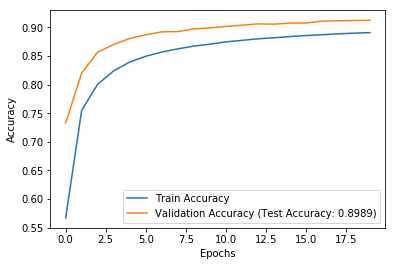

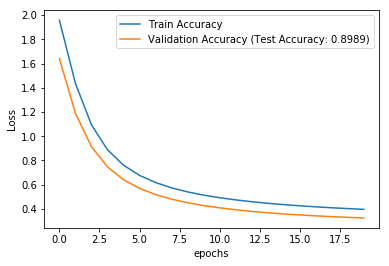

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
#variation in layers
history=[]
label=[]

for i in range(1,4):
  [h,s]=train_model(layers=i, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=epoch)
  history.append(h)   
  label.append("No of Hidden Layers {} (Test Accuracy: {})".format(i,s[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 26us/step - loss: 1.9938 - acc: 0.5237 - val_loss: 1.6706 - val_acc: 0.7182
Epoch 2/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.4615 - acc: 0.7495 - val_loss: 1.2083 - val_acc: 0.8212
Epoch 3/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.1095 - acc: 0.8011 - val_loss: 0.9228 - val_acc: 0.8595
Epoch 4/20
54000/54000 [==============================] - 1s 22us/step -

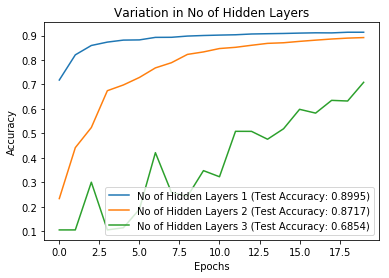

In [0]:
print_plot(history,"Variation in No of Hidden Layers"," epochs","acc",label)

In [0]:
#variation in Activation Func
history=[]
label=[]

for i in ['sigmoid','tanh','relu']:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=i, 
                    batch_size=batch_size, 
                    epochs=epoch)
  history.append(h)   
  label.append("Activation Function {} (Test Accuracy: {})".format(i,s[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 28us/step - loss: 1.9916 - acc: 0.5323 - val_loss: 1.6753 - val_acc: 0.7487
Epoch 2/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.4668 - acc: 0.7509 - val_loss: 1.2142 - val_acc: 0.8263
Epoch 3/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.1141 - acc: 0.8003 - val_loss: 0.9277 - val_acc: 0.8547
Epoch 4/20
54000/54000 [==============================] - 1s 23us/step -

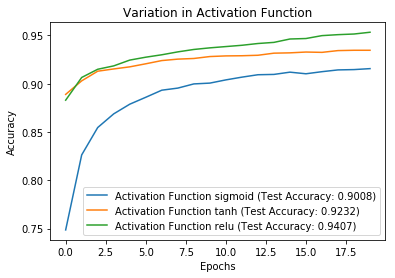

In [0]:
print_plot(history,"Variation in Activation Function"," epochs","acc",label)

In [0]:
#Variation in epochs
history=[]
label=[]

for i in range(20,81,20):
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    optimizer=optimizer, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=i)
  history.append(h)   
  label.append("Epochs {} (Test Accuracy: {})".format(i,s[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 28us/step - loss: 1.9844 - acc: 0.5428 - val_loss: 1.6621 - val_acc: 0.7365
Epoch 2/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.4570 - acc: 0.7513 - val_loss: 1.2057 - val_acc: 0.8270
Epoch 3/20
54000/54000 [==============================] - 1s 23us/step - loss: 1.1097 - acc: 0.7986 - val_loss: 0.9250 - val_acc: 0.8532
Epoch 4/20
54000/54000 [==============================] - 1s 23us/step -

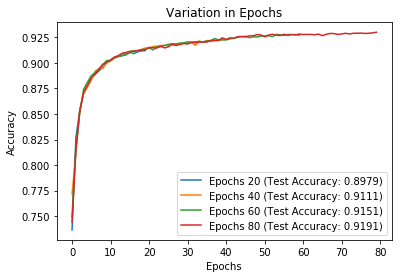

In [0]:
print_plot(history,"Variation in Epochs"," epochs","acc",label)

In [0]:
  #Variation in Batch Size
  history=[]
  label=[]
  
  i=128
  while i<1025:
    [h,s]=train_model(layers=number_of_hidden_layers, 
                      hidden_layer_width=hidden_layer_width, 
                      optimizer=optimizer, 
                      activation_fn=activation_fn, 
                      batch_size=i, 
                      epochs=epoch)
    history.append(h)   
    label.append("Batch Size {} (Test Accuracy: {})".format(i,s[1]))
    i*=2
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 30us/step - loss: 1.9643 - acc: 0.5557 - val_loss: 1.6389 - val_acc: 0.7530
Epoch 2/20
54000/54000 [==============================] - 1s 22us/step - loss: 1.4399 - acc: 0.7566 - val_loss: 1.1893 - val_acc: 0.8225
Epoch 3/20
54000/54000 [==============================] - 1s 22us/step - loss: 1.0952 - acc: 0.8015 - val_loss: 0.9097 - val_acc: 0.8593
Epoch 4/20
54000/54000 [==============================] - 1s 22us/step -

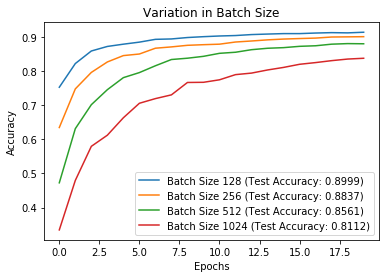

In [0]:
print_plot(history,"Variation in Batch Size"," epochs","acc",label)